# Comments sentiment Index 

In [1]:
from tqdm import tqdm_notebook
import pickle

import numpy as np
import pandas as pd
import datetime

import matplotlib
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
matplotlib.style.use('ggplot')

%matplotlib inline

# Aggregation

In [2]:
!ls /Users/fulyankin/Yandex.Disk.localized/projects/news/news_parser/news_data/vk_news/posts

interfax_vk_posts        meduza_vk_posts          tass_vk_posts
komersant_vk_posts       rbc_vk_posts             vedomosty_vk_posts
lenta_vk_posts           rg_vk_posts              vk_posts_tag_lemm.pickle
lentach_1_vk_posts       ria_vk_posts
lentach_2_vk_posts       rt_vk_posts


In [3]:
files = !ls /Users/fulyankin/Yandex.Disk.localized/projects/news/news_parser/news_data/vk_news/comments
files

['interfax_vk_comments_sen',
 'komersant_vk_comments_2020-06-01_sen',
 'komersant_vk_comments_sen',
 'lenta_vk_comments_2020-06-01_sen',
 'lenta_vk_comments_sen',
 'lentach_1_vk_comments_sen',
 'lentach_1_vk_commetns_2020-06-01_sen',
 'lentach_2_vk_comments_2020-06-01_sen',
 'lentach_2_vk_comments_sen',
 'meduza_vk_comments_2020-06-01_sen',
 'meduza_vk_comments_sen',
 'rbc_vk_comments_2020-06-01_sen',
 'rbc_vk_comments_sen',
 'rg_vk_comments_2020-06-01_sen',
 'rg_vk_comments_sen',
 'ria_vk_comments_2020-06-01_sen',
 'ria_vk_comments_sen',
 'rt_part1_vk_comments_sen',
 'rt_part2_vk_comments_sen',
 'rt_vk_comments_2020-06-01_sen',
 'tass_vk_comments_2020-06-01_sen',
 'tass_vk_comments_sen',
 'vedomosty_vk_comments_2020-06-01_sen',
 'vedomosty_vk_comments_sen']

In [4]:
# Путь к данным
path = '/Users/fulyankin/Yandex.Disk.localized/projects/news/news_parser/news_data/vk_news/'
dfs = [ ]

In [5]:
for file in files:
    
    print(file, '\n')  
    with open(path + 'comments/' + file, 'rb') as f:
        comments = pickle.load(f)
            
    comments_sub = [
        {
            'post_id': item['post_id'], 
            'likes': item['likes'], 
            'rusentiment_model': item['rusentiment_model'][0].lower() 
                if len(item['rusentiment_model']) == 1 else item['rusentiment_model'],
        } 
        for item in comments
    ]
    
    df_com = pd.DataFrame(comments_sub)
    print(df_com.rusentiment_model.value_counts(), '\n')
    
    neg = lambda w: len([v for v in list(w) if v=='negative'])
    pos = lambda w: len([v for v in list(w) if v=='positive'])
    ano = lambda w: len([v for v in list(w) if v!='positive' and v!='negative'])

    agg_fun = {
        'rusentiment_model': {
            'rusent_cnt': 'count', 
            'rusent_pos': pos, 
            'rusent_neg': neg, 
            'rusent_ano': ano
        }
    }

    df_agg = df_com.groupby('post_id').agg(agg_fun).rusentiment_model    
    dfs.append(df_agg)
    
    print("-------------------------------")

interfax_vk_comments_sen 

neutral     41586
negative     9324
positive     2142
skip         1951
speech        256
Name: rusentiment_model, dtype: int64 



/usr/local/lib/python3.7/site-packages/pandas/core/groupby/generic.py:1455: FutureWarning: using a dict with renaming is deprecated and will be removed
in a future version.

For column-specific groupby renaming, use named aggregation

    >>> df.groupby(...).agg(name=('column', aggfunc))

  return super().aggregate(arg, *args, **kwargs)


-------------------------------
komersant_vk_comments_2020-06-01_sen 

neutral     49024
negative     8610
skip         2238
positive     1986
speech        326
Name: rusentiment_model, dtype: int64 

-------------------------------
komersant_vk_comments_sen 

neutral     982301
negative    185384
positive     47721
skip         43770
speech        5923
Name: rusentiment_model, dtype: int64 

-------------------------------
lenta_vk_comments_2020-06-01_sen 

neutral     70618
negative    12496
positive     4696
skip         4025
speech        532
Name: rusentiment_model, dtype: int64 

-------------------------------
lenta_vk_comments_sen 

neutral     2806417
negative     533584
skip         194925
positive     166012
speech        15589
Name: rusentiment_model, dtype: int64 

-------------------------------
lentach_1_vk_comments_sen 

neutral     4638610
negative     846335
skip         309148
positive     242924
speech        33416
Name: rusentiment_model, dtype: int64 

-----------

In [62]:
len(dfs)

24

In [63]:
[d.shape for d in dfs]

[(13402, 4),
 (3501, 4),
 (120178, 4),
 (3039, 4),
 (119694, 4),
 (29361, 4),
 (99, 4),
 (400, 4),
 (21309, 4),
 (2615, 4),
 (59523, 4),
 (1819, 4),
 (48472, 4),
 (4690, 4),
 (83757, 4),
 (3711, 4),
 (59611, 4),
 (46709, 4),
 (61963, 4),
 (8658, 4),
 (5470, 4),
 (113258, 4),
 (2105, 4),
 (42425, 4)]

In [64]:
dff_big = pd.concat(dfs)
print(dff_big.shape)

dff_big = dff_big.reset_index().groupby('post_id').agg('max')
dff_big.shape

(855769, 4)


(809326, 4)

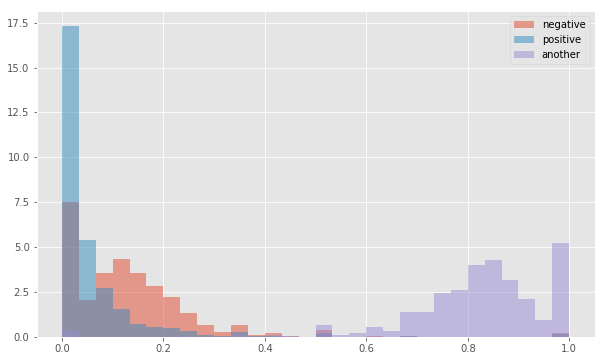

In [89]:
plt.figure(figsize=(10,6))
(dff_big.rusent_neg/dff_big.rusent_cnt).hist(alpha=0.5, label="negative", density=True, bins=30)
(dff_big.rusent_pos/dff_big.rusent_cnt).hist(alpha=0.5, label="positive", density=True, bins=30)
(dff_big.rusent_ano/dff_big.rusent_cnt).hist(alpha=0.5, label="another", density=True, bins=30)
plt.legend();

In [65]:
with open("../news_parser/news_data/vk_news/posts/vk_posts_tag_lemm.pickle", 'rb') as f:
    posts = pickle.load(f)
    
df_post = pd.DataFrame(posts)
print(df_post.shape)

df_post['post_id'] = df_post['id']
df_post.drop(['id', 'owner_id', 'from_id'], axis=1, inplace=True)
df_post = df_post.drop_duplicates(subset='post_id')
df_post.set_index("post_id", inplace=True)
df_post.shape

(1184166, 13)


(1066388, 10)

In [66]:
df = pd.merge(df_post, dff_big, how='left', on='post_id')

df['date'] = df.date.apply(lambda w: datetime.datetime.utcfromtimestamp(w).strftime('%Y-%m-%d'))
print(df.date.apply(lambda w: w.split('-')[0]).value_counts(), '\n')

df = df[df.date >= '2012-01-01']
print(f'размер после 1 января 2012 года {df.shape} \n')
print(f'размер если коментов больше 10 {df[df.comments >= 10].shape} \n')

100*df.isnull().sum()/df.shape[0]

2018    256640
2019    247763
2017    165912
2016    115405
2020    103239
2015     82890
2014     52285
2013     22531
2012     15038
2011      4684
2010         1
Name: date, dtype: int64 

размер после 1 января 2012 года (1061703, 14) 

размер если коментов больше 10 (536307, 14) 



likes            0.000000
reposts          0.000000
comments         0.000000
text             0.000000
date             0.000000
url             54.426238
title           54.426238
text_tagged      0.000000
title_tagged     0.000000
source           0.000000
rusent_cnt      23.976762
rusent_pos      23.976762
rusent_neg      23.976762
rusent_ano      23.976762
dtype: float64

In [72]:
df['title_tagged'] = df.title_tagged.apply(lambda w: ' '.join(w))
df['text_tagged'] = df.text_tagged.apply(lambda w: ' '.join(w))

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1061703 entries, 114353 to 1134425
Data columns (total 14 columns):
likes           1061703 non-null int64
reposts         1061703 non-null int64
comments        1061703 non-null int64
text            1061703 non-null object
date            1061703 non-null object
url             483858 non-null object
title           483858 non-null object
text_tagged     1061703 non-null object
title_tagged    1061703 non-null object
source          1061703 non-null object
rusent_cnt      807141 non-null float64
rusent_pos      807141 non-null float64
rusent_neg      807141 non-null float64
rusent_ano      807141 non-null float64
dtypes: float64(4), int64(3), object(7)
memory usage: 121.5+ MB


In [76]:
df.to_csv('vk_post_sentiment.tsv', sep='\t')

In [77]:
df.head()

,likes,reposts,comments,text,date,url,title,text_tagged,title_tagged,source,rusent_cnt,rusent_pos,rusent_neg,rusent_ano
post_id,,,,,,,,,,,,,,
114353,1,0,0,Скончался диктор Центрального телевидения Евге...,2019-02-02,https://www.interfax.ru/russia/648850,Скончался диктор Центрального телевидения Евге...,скончаться_VERB диктор_NOUN центральный_ADJ те...,скончаться_VERB диктор_NOUN центральный_ADJ те...,interfax_vk_posts,NaN,NaN,NaN,NaN
114352,0,0,0,Троим подозреваемым в причастности к теракту в...,2019-02-02,https://www.interfax.ru/world/648849,Троим подозреваемым в причастности к теракту в...,трое_NUM подозреваемый_NOUN в_ADP причастность...,трое_NUM подозреваемый_NOUN в_ADP причастность...,interfax_vk_posts,NaN,NaN,NaN,NaN
114351,0,0,0,Троим подозреваемым в причастности к теракту в...,2019-02-02,https://www.interfax.ru/world/648849,Троим подозреваемым в причастности к теракту в...,трое_NUM подозреваемый_NOUN в_ADP причастность...,трое_NUM подозреваемый_NOUN в_ADP причастность...,interfax_vk_posts,NaN,NaN,NaN,NaN
114350,0,0,0,Минэнерго США запретит своим ученым участвоват...,2019-02-02,https://www.interfax.ru/world/648847,Минэнерго США запретит своим ученым участвоват...,минэнерго_NOUN сша_NOUN запрещать_VERB свой_DE...,минэнерго_NOUN сша_NOUN запрещать_VERB свой_DE...,interfax_vk_posts,2.0,1.0,0.0,1.0
114349,2,1,0,Минэнерго США запретило своим ученым участвова...,2019-02-02,https://www.interfax.ru/world/648847,Минэнерго США запретило своим ученым участвова...,минэнерго_NOUN сша_NOUN запрещать_VERB свой_DE...,минэнерго_NOUN сша_NOUN запрещать_VERB свой_DE...,interfax_vk_posts,NaN,NaN,NaN,NaN







--------------------








